In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df=pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [28]:
df.shape

(150, 6)

In [29]:
print(df.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [33]:
df.drop(['Id'],axis=1, inplace=True)

In [34]:
print(df.columns)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [35]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

# 2-D scatter plot 

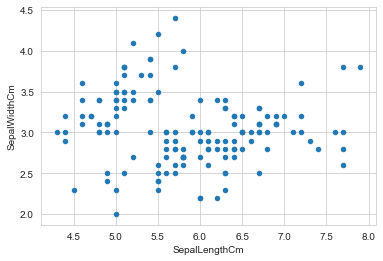

In [36]:
df.plot(kind='scatter',x ='SepalLengthCm',y='SepalWidthCm')
plt.show()

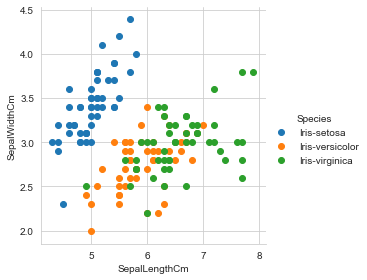

In [37]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue="Species",size=4) \
    .map(plt.scatter,"SepalLengthCm",'SepalWidthCm') \
    .add_legend()
plt.show()

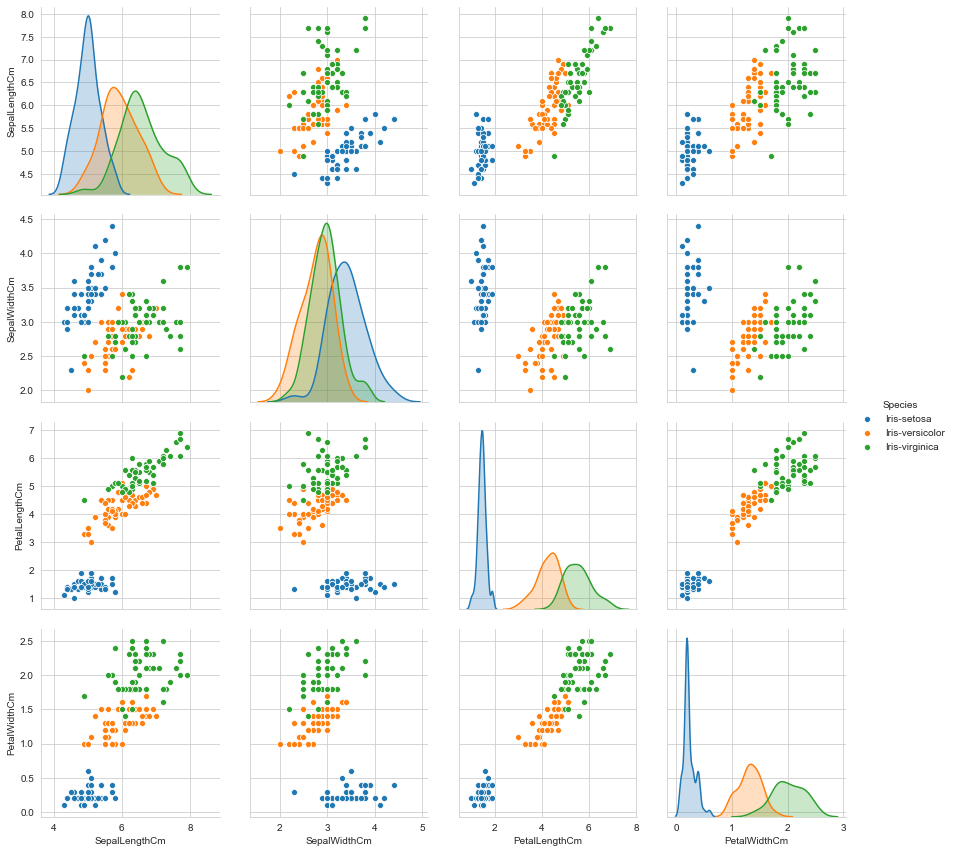

In [38]:
sns.set_style('whitegrid')
sns.pairplot(df,hue="Species",size=3)
plt.show()

# univariate analysis

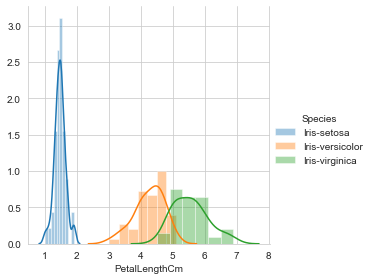

In [41]:
sns.FacetGrid(df,hue="Species",size=4)\
    .map(sns.distplot, 'PetalLengthCm')\
    .add_legend()
plt.show()

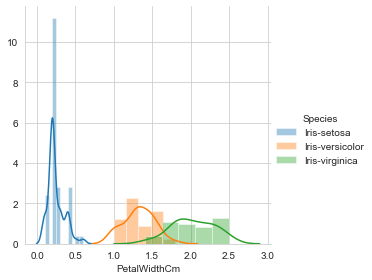

In [42]:
sns.FacetGrid(df,hue="Species",size=4)\
    .map(sns.distplot, 'PetalWidthCm')\
    .add_legend()
plt.show()

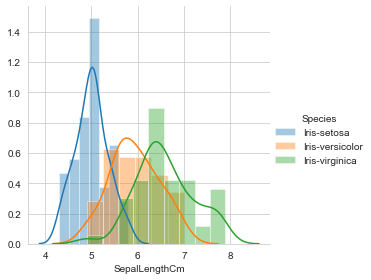

In [43]:
sns.FacetGrid(df,hue="Species",size=4)\
    .map(sns.distplot, 'SepalLengthCm')\
    .add_legend()
plt.show()

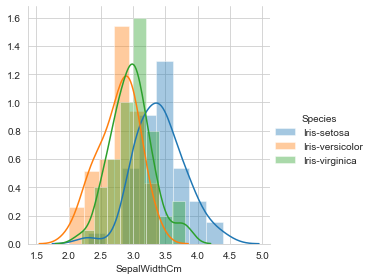

In [44]:
sns.FacetGrid(df,hue="Species",size=4)\
    .map(sns.distplot, 'SepalWidthCm')\
    .add_legend()
plt.show()

# Mean,Median,Variance and std-dev


In [75]:

print("Means:")
df.groupby(['Species'])['PetalLengthCm'].mean()
#print(np.mean(iris_setosa['PetalLengthCm']))

Means:


Species
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: PetalLengthCm, dtype: float64

In [76]:
print("Median :")
df.groupby(['Species'])['PetalLengthCm'].median()

Median :


Species
Iris-setosa        1.50
Iris-versicolor    4.35
Iris-virginica     5.55
Name: PetalLengthCm, dtype: float64

In [77]:
print("Std-dev:")
df.groupby(['Species'])['PetalLengthCm'].std()

Std-dev:


Species
Iris-setosa        0.173511
Iris-versicolor    0.469911
Iris-virginica     0.551895
Name: PetalLengthCm, dtype: float64

In [78]:
print("Variance:")
df.groupby(['Species'])['PetalLengthCm'].var()

Variance:


Species
Iris-setosa        0.030106
Iris-versicolor    0.220816
Iris-virginica     0.304588
Name: PetalLengthCm, dtype: float64

# Box plot

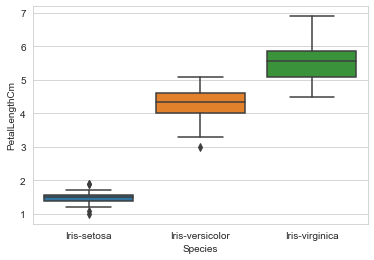

In [80]:
sns.boxplot(x="Species", y="PetalLengthCm",data=df)
plt.show()

# 

# Violin plot

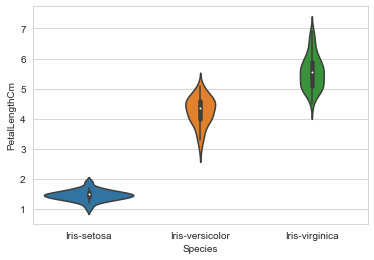

In [81]:
sns.violinplot(x="Species",y='PetalLengthCm', data=df,size=8)
plt.show()

[nan nan nan nan nan nan nan nan nan nan]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


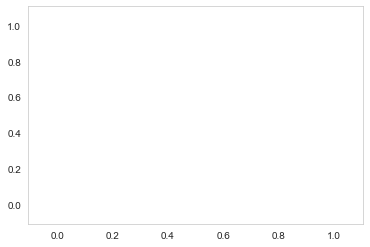

In [86]:
iris_setosa = df.loc[df["Species"] == "setosa"]
iris_virginica = df.loc[df["Species"] == "virginica"]
iris_versicolor = df.loc[df["Species"] == "versicolor"]
counts , bin_edges = np.histogram(iris_setosa['PetalLengthCm'],bins=10 , density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.grid()
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)